### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Data Collection
import pandas_datareader as pdr
key=""

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key='155534f2a9bd5abcafe25dd803a58bbc5b9fcf0a')

D:\anaconda\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-07-30 00:00:00+00:00,189.91,192.20,189.07,191.90,21029535,45.369251,45.916329,45.168576,45.844659,84118140,0.0,1.0
1,AAPL,2018-07-31 00:00:00+00:00,190.29,192.14,189.34,190.30,39373038,45.460032,45.901995,45.233078,45.462421,157492152,0.0,1.0
2,AAPL,2018-08-01 00:00:00+00:00,201.50,201.76,197.31,199.13,67935716,48.138087,48.200200,47.137101,47.571897,271742864,0.0,1.0
3,AAPL,2018-08-02 00:00:00+00:00,207.39,208.38,200.35,200.58,62404012,49.545200,49.781710,47.863353,47.918300,249616048,0.0,1.0
4,AAPL,2018-08-03 00:00:00+00:00,207.99,208.74,205.48,207.03,33447396,49.688539,49.867713,49.088903,49.459196,133789584,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-07-20 00:00:00+00:00,193.13,196.47,192.495,195.09,59581196,193.13,196.47,192.495,195.09,59581196,0.0,1.0
1252,AAPL,2023-07-21 00:00:00+00:00,191.94,194.97,191.230,194.10,71951683,191.94,194.97,191.230,194.10,71951683,0.0,1.0
1253,AAPL,2023-07-24 00:00:00+00:00,192.75,194.91,192.250,193.41,45505097,192.75,194.91,192.250,193.41,45505097,0.0,1.0
1254,AAPL,2023-07-25 00:00:00+00:00,193.62,194.44,192.915,193.33,37283201,193.62,194.44,192.915,193.33,37283201,0.0,1.0
1255,AAPL,2023-07-26 00:00:00+00:00,194.50,195.64,193.320,193.67,47471868,194.50,195.64,193.320,193.67,47471868,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       189.91
1       190.29
2       201.50
3       207.39
4       207.99
         ...  
1251    193.13
1252    191.94
1253    192.75
1254    193.62
1255    194.50
Name: close, Length: 1256, dtype: float64

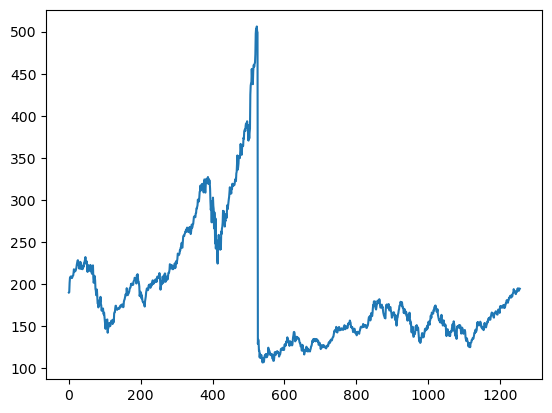

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
import numpy as np

In [13]:
df1

0       189.91
1       190.29
2       201.50
3       207.39
4       207.99
         ...  
1251    193.13
1252    191.94
1253    192.75
1254    193.62
1255    194.50
Name: close, Length: 1256, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.20806512]
 [0.20901691]
 [0.23709455]
 ...
 [0.21517846]
 [0.21735755]
 [0.21956168]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(816, 440)

In [18]:
train_data

array([[2.08065122e-01],
       [2.09016907e-01],
       [2.37094552e-01],
       [2.51847214e-01],
       [2.53350031e-01],
       [2.56055103e-01],
       [2.51145899e-01],
       [2.51496556e-01],
       [2.55579211e-01],
       [2.52197871e-01],
       [2.55554164e-01],
       [2.57758297e-01],
       [2.58985598e-01],
       [2.66700063e-01],
       [2.77370069e-01],
       [2.72060113e-01],
       [2.71008140e-01],
       [2.71033187e-01],
       [2.72135254e-01],
       [2.73813400e-01],
       [2.78271760e-01],
       [2.82680025e-01],
       [2.90895429e-01],
       [2.96030056e-01],
       [3.02542267e-01],
       [3.04370695e-01],
       [3.00638698e-01],
       [2.91195992e-01],
       [2.86687539e-01],
       [2.79248591e-01],
       [2.93074515e-01],
       [2.86111459e-01],
       [2.99486537e-01],
       [2.93049468e-01],
       [2.78121478e-01],
       [2.79023168e-01],
       [2.79348779e-01],
       [2.83506575e-01],
       [2.77570445e-01],
       [2.85410144e-01],


In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 242ms/step - loss: 0.0454 - val_loss: 0.0012
Epoch 2/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0172 - val_loss: 0.0041
Epoch 3/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0107 - val_loss: 4.3050e-04
Epoch 4/100
12/12 [==============================] - 2s 129ms/step - loss: 0.0086 - val_loss: 6.2377e-04
Epoch 5/100
12/12 [==============================] - 2s 126ms/step - loss: 0.0078 - val_loss: 3.5425e-04
Epoch 6/100
12/12 [==============================] - 2s 127ms/step - loss: 0.0073 - val_loss: 3.5645e-04
Epoch 7/100
12/12 [==============================] - 2s 126ms/step - loss: 0.0064 - val_loss: 2.7361e-04
Epoch 8/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0060 - val_loss: 4.7961e-04
Epoch 9/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0052 - val_loss: 6.4976e-04
Epoch 10/100
12/12 [==============================] - 2s 133ms

12/12 [==============================] - 2s 127ms/step - loss: 0.0021 - val_loss: 2.3793e-04
Epoch 79/100
12/12 [==============================] - 2s 127ms/step - loss: 0.0021 - val_loss: 2.0603e-04
Epoch 80/100
12/12 [==============================] - 2s 128ms/step - loss: 0.0018 - val_loss: 2.4113e-04
Epoch 81/100
12/12 [==============================] - 2s 127ms/step - loss: 0.0051 - val_loss: 4.7829e-04
Epoch 82/100
12/12 [==============================] - 2s 129ms/step - loss: 0.0041 - val_loss: 1.8862e-04
Epoch 83/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0031 - val_loss: 2.1059e-04
Epoch 84/100
12/12 [==============================] - 2s 124ms/step - loss: 0.0023 - val_loss: 2.5712e-04
Epoch 85/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0019 - val_loss: 2.2898e-04
Epoch 86/100
12/12 [==============================] - 2s 129ms/step - loss: 0.0027 - val_loss: 2.4717e-04
Epoch 87/100
12/12 [==============================] - 1s 12

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.11.0'

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 27ms/step


In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

232.47328390684117

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

166.71661218486702

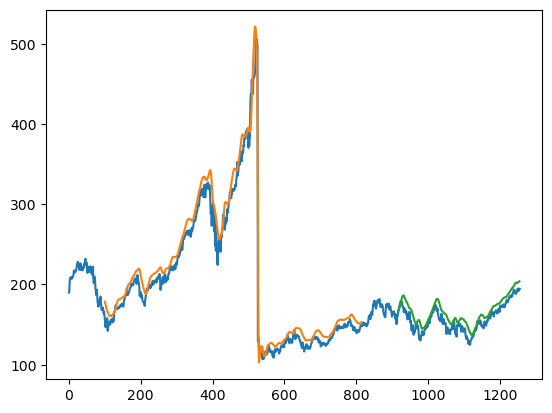

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

440

In [37]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.1626299311208

In [40]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: cannot reshape array of size 99 into shape (1,100,1)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)